# Exploratory analiysis 
### Objective: predict which passengers survived the titanic by their data


In [4]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sn
import scipy.stats as stats
import numpy as np
import re
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 900)

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print('Train shape:',train.shape,'\n','Test shape',test.shape)
train.head()

Train shape: (891, 12) 
 Test shape (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Independent variables
* **Categorical** : Pclass, Embarked, Sex
* **Quatitative** : Age, Fare, SibSp, Parch
* **'Tricky ones'**: Name, Ticket, Cabin
* **Key**: PassengerId 

### Dependent variables
* **Categorical** : Survived 


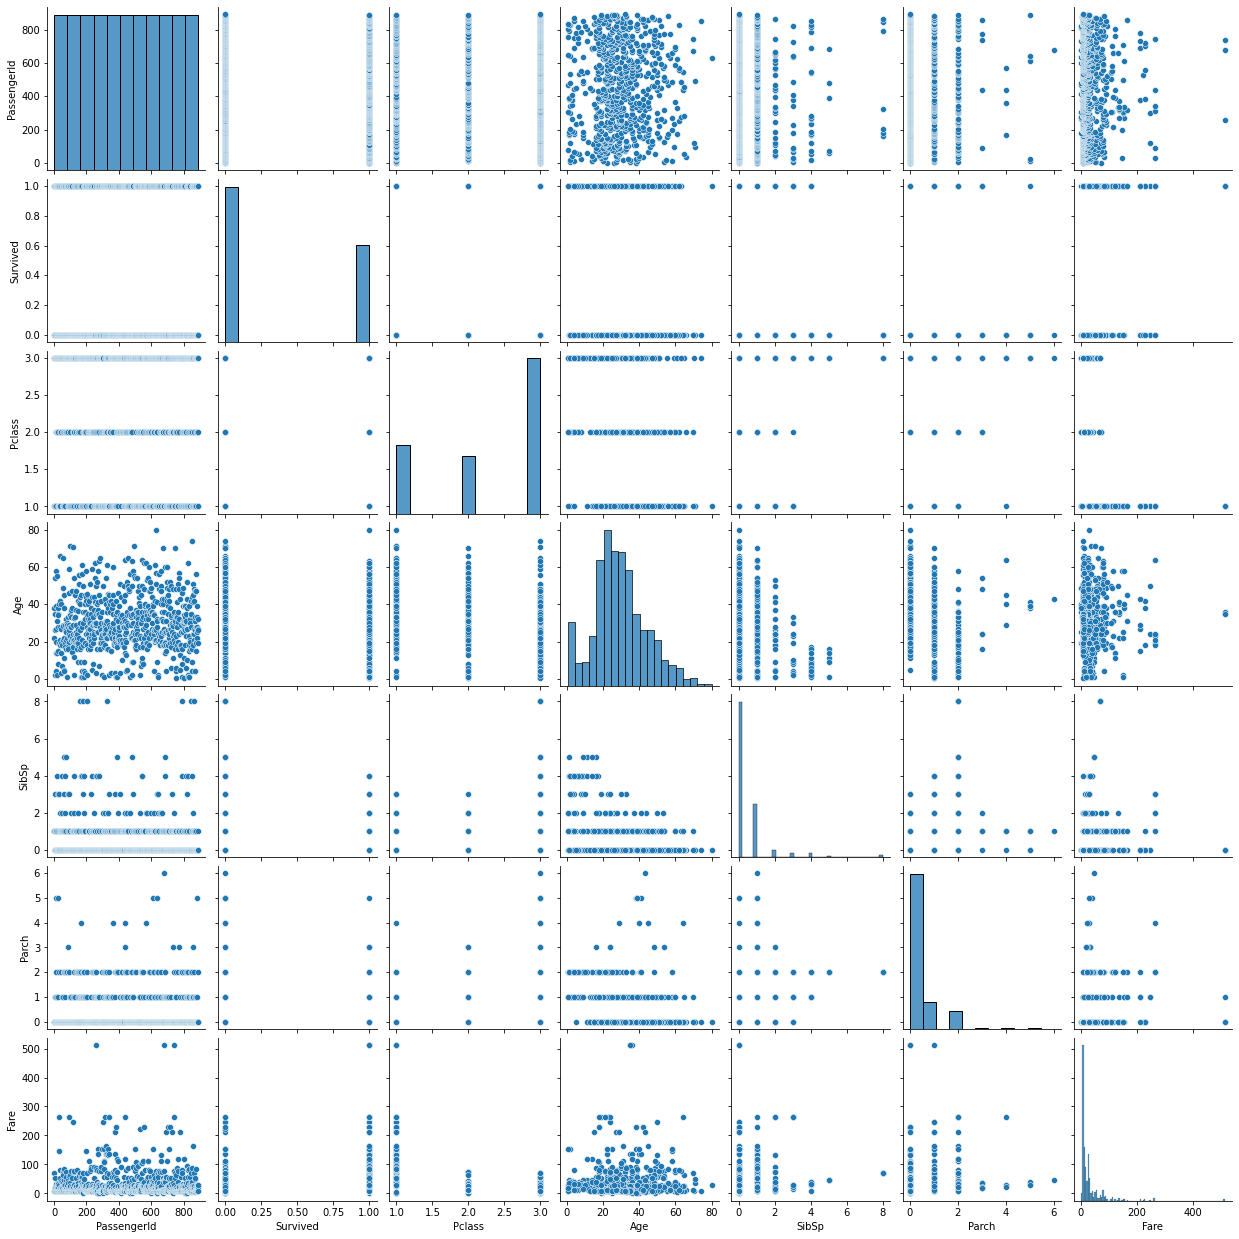

In [6]:
sn.pairplot(train)

Here we can see that there's no trivial connection between Survived ones our variables. But we can see some outliers. 
* People who had a higher number of Siblings per supouse aboard (from 4 on) died.
* People who paid an extremely high fare survived

We can see that people who were aged above 65ish died, but there's an outlier with 80 who survived. It's hard to say much more than that looking at this, let's dive into descriptive statistics:


In [7]:
train.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Looking at the matrix above we can see that:
* **1)** Most of the people died, since the mean of 'Survived' is lower than .5 (let's check how many, on our sample below)
* **2)** People aboard were young, about 30 year 
* **3)** People had paid about **32K on average to die or almost die** 
* **4)** There are missing values in Age (because the count islower than 891, later I'll fill them up with the mean of age)

In [8]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

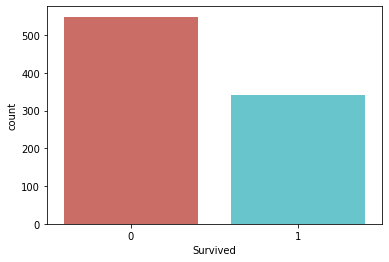

In [9]:
sn.countplot(x='Survived', data=train, palette = 'hls')
plt.show()

As expected most people really died at Titanic, but let's take a look into the percentage 

In [10]:
train.groupby(by = 'Survived').size()/train.groupby(by = 'Survived').size().sum() *100

Survived
0    61.616162
1    38.383838
dtype: float64

In [11]:
train.groupby(by = 'Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [12]:
train.groupby(by = 'Survived').median()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,455.0,3.0,28.0,0.0,0.0,10.5
1,439.5,2.0,28.0,0.0,0.0,26.0


We do have an unbalanced dataset since 61% of people died and only 38% survived.
Looking at the means for each quatitative variable we see that:
* **1)** People travaling in first class had better chances of surviving than people in 3rd 
* **2)** People without suposes and siblings performed just a little better than with
* **3)** Children with parents aboard had a higher chance of surviving
* **4)** People who survived had paid a higher fare (2.6X more)

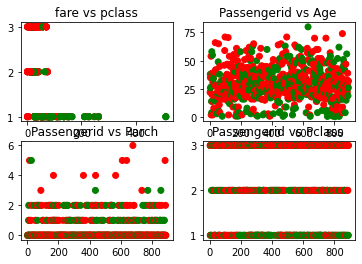

In [13]:
train['col'] = 0
train.loc[train['Survived']==1, 'col'] = 'g'
train.loc[train['Survived']==0, 'col'] = 'r'

fig,a =  plt.subplots(2,2)

a[0][0].scatter(train.Fare,train.Pclass, c = train.col)
a[0][0].set_title('fare vs pclass')
a[0][1].scatter(train.PassengerId,train.Age, c = train.col)
a[0][1].set_title('Passengerid vs Age ')
a[1][0].scatter(train.PassengerId,train.Parch, c = train.col)
a[1][0].set_title('Passengerid vs Parch ')
a[1][1].scatter(train.PassengerId, train.Pclass, c = train.col)
a[1][1].set_title('Passengerid vs Pclass ')
plt.show()

Let's take a look into the correlation between quatitative varialbes: 

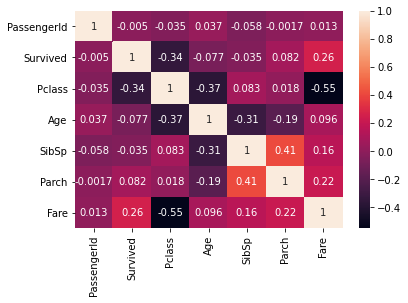

In [14]:
corrMatrix = train.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

Looking at the correlation we can see that the most representative quatitative variables for **Survived** are: Pclass and Fare

It looks like there's a connection between the class where the passenger were and its survivor rate. Let's check.

Can I look into the correlation for categorical variable codified as a number?

In [15]:
train.groupby(by = ['Pclass', 'Survived']).size()/train.groupby(by = 'Pclass').size() *100

Pclass  Survived
1       0           37.037037
        1           62.962963
2       0           52.717391
        1           47.282609
3       0           75.763747
        1           24.236253
dtype: float64

Now we can actually see that the **62% of people in the first class survived**, while only **24% in the 3rd**. Despite this fact the second class seams to be equally distibuted 


## Let's take a look into the other categorical variables
### Sex

In [16]:
train.groupby(by = 'Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


Text(0, 0.5, 'Number of people')

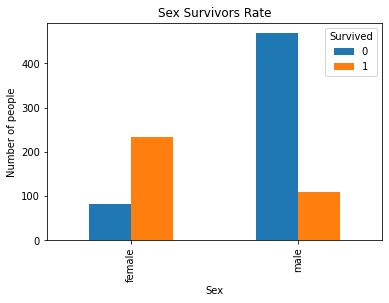

In [17]:
%matplotlib inline
pd.crosstab(train.Sex,train.Survived).plot(kind='bar')
plt.title('Sex Survivors Rate')
plt.xlabel('Sex')
plt.ylabel('Number of people')

It's really impressive how famale survived more than male ones. While **81% of males died** only **25% of females did** 

In [18]:
train.groupby(by = ['Sex','Pclass']).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        469.212766  0.968085  34.611765  0.553191  0.457447   
       2        443.105263  0.921053  28.722973  0.486842  0.605263   
       3        399.729167  0.500000  21.750000  0.895833  0.798611   
male   1        455.729508  0.368852  41.281386  0.311475  0.278689   
       2        447.962963  0.157407  30.740707  0.342593  0.222222   
       3        455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Sex    Pclass              
female 1       106.125798  
       2        21.970121  
       3        16.118810  
male   1        67.226127  
       2        19.741782  
       3        12.661633

If we combine both class and sex we obtain this table above, where we can see that woman in the first class actually outpermored any other group 

### Pclass

In [19]:
train.groupby(by = 'Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


Text(0, 0.5, 'Number of people')

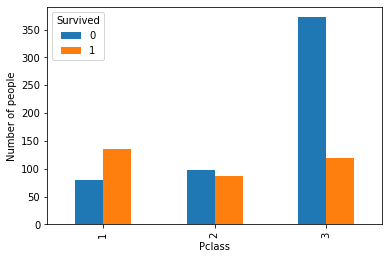

In [20]:
%matplotlib inline
pd.crosstab(train.Pclass,train.Survived).plot(kind='bar')
plt.title('')
plt.xlabel('Pclass')
plt.ylabel('Number of people')

### Embarked

In [21]:
train.groupby(by = 'Embarked').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,445.357143,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144
Q,417.896104,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030
S,449.527950,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812


Text(0, 0.5, 'Number of people')

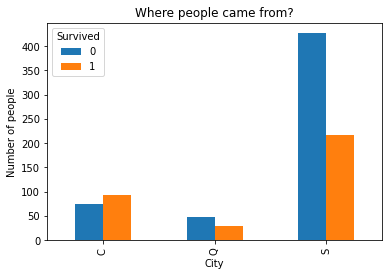

In [22]:
%matplotlib inline
pd.crosstab(train.Embarked,train.Survived).plot(kind='bar')
plt.title('Where people came from?')
plt.xlabel('City')
plt.ylabel('Number of people')

Look and see that people who boarded in C had better chances of surviving, but only a small amount of the total


### Tricky Variables : Name, Ticket number, Cabin
Starting with Name, we can actually get the title from the person's name. For example: Braund, Mr. Owen Harris has a Mr. title. Then we can classify people by theirs titles and see if there's any relationship between them and the survivor rate.

In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,col
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,r
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,g
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,g
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,g
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,r


### Tricky n 1: name

In [24]:
titles = train['Name'].str.extract(pat = '([,].{1,13}[.])') #select titles 
titles.rename(columns = {0:'Name'},inplace=True) # rename titles df 
titles = titles.Name.str.slice(start=2, stop=-1) # takes only the title 
titles.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [25]:
def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col', 'Sir']: #tried male high society but it's the same as mr
        return 'Mr'
    elif title in ['the Countess','Lady']: 
        return 'Mrs' # they are actually outliers and only two
    elif title in 'Mme':
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title in['Dr','Master']: # I was actually put them into Mr, but they seam to have a very different mean 
        return 'Scientist'
    else:
        return title
    
train['Title']= titles
train.Title = train.apply(replace_titles, axis=1)
train.groupby(by = 'Title').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Title,,,,,,,
Miss,411.967568,0.702703,2.291892,21.845638,0.702703,0.540541,43.800092
Mr,456.534840,0.158192,2.384181,32.891990,0.286252,0.152542,24.521491
Mrs,455.718750,0.796875,1.976562,35.873874,0.687500,0.812500,45.607161
Scientist,434.468085,0.553191,2.425532,9.920714,2.042553,1.170213,36.857536


In [26]:
train.groupby(by = 'Title').size()

Title
Miss         185
Mr           531
Mrs          128
Scientist     47
dtype: int64

Take a look at survived mean by class title. You'll see that Mr are the class with lowest surviving rate. Then we see that scientists (usually men) have a 3.5 more chance to survive than normal man. We can also see that the woman's chance to survive were much higher than the othes and the maried ones even better chance. Man with high society title were included with normal man since statistics were quite the same. And look at Female high society, the number of counted is too low to say something. 

### Tricky n 2 : Cabin

In [27]:
train['Floor'] = train.Cabin.str.slice(start=0, stop=1)
train.loc[~train.Cabin.isnull(),'Cabin'] = 'With'
train.Cabin.fillna('Without', inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,col,Title,Floor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Without,S,r,Mr,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,With,C,g,Mrs,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Without,S,g,Miss,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,With,S,g,Mrs,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Without,S,r,Mr,NaN


In [28]:
train.groupby(by = 'Cabin').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Cabin,,,,,,,
With,455.401961,0.666667,1.196078,35.829297,0.441176,0.436275,76.141504
Without,443.208151,0.299854,2.639010,27.555293,0.547307,0.365357,19.157325


Passengers with cabin had better chances than those who didn't have

## Let's take a look at categorical variables, looking at chi square
### Sex

In [29]:
x = pd.crosstab(train.Sex, train.Survived, margins=True)
#= train.groupby(by = ['Sex','Survived']).size()
x.columns = ['Died','Survived', 'Total Passengers']
x.index = ['Female', 'Male', 'Total']
obser = x.iloc[0:2,0:2]
obser

,Died,Survived
Female,81,233
Male,468,109


In [30]:
stat = stats.chi2_contingency(observed=obser)
stat

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 120.52525253],
        [355.52525253, 221.47474747]]))

In [31]:
crit = stats.chi2.ppf(q=0.95, df=1)
crit

3.841458820694124

Since our p-statistic is really low(10e-58), we can reject the H0(null hypothesis and say that there's a connection between the **Sex** and **Survived**. We also see a high chi square, far higher than the critical. 

### Pclass

In [32]:
x = pd.crosstab(train.Pclass, train.Survived, margins=True)

x.columns = ['Died','Survived', 'Total Passengers']
x.index = ['First Class', 'Second Class', 'Third Class', 'Either']
obser = x.iloc[:-1,:-1]
obser

,Died,Survived
First Class,80,136
Second Class,97,87
Third Class,372,119


In [33]:
stat = stats.chi2_contingency(observed=obser)
stat

(102.88898875696056,
 4.549251711298793e-23,
 2,
 array([[133.09090909,  82.90909091],
        [113.37373737,  70.62626263],
        [302.53535354, 188.46464646]]))

In [34]:
crit = stats.chi2.ppf(q=0.95, df=2)
crit

5.991464547107979

It seams to have a connection between the **Pclass** and **Survived**

##  Embarked

In [35]:
x = pd.crosstab(train.Embarked, train.Survived, margins=True)

x.columns = ['Died','Survived', 'Total Passengers']
x.index = ['Cherbourg', 'Queenstown', 'Southampton', 'Either']
obser = x.iloc[:-1,:-1]
obser

,Died,Survived
Cherbourg,75,93
Queenstown,47,30
Southampton,427,217


In [36]:
stat = stats.chi2_contingency(observed=obser)
stat

(26.48914983923762,
 1.769922284120912e-06,
 2,
 array([[103.7480315,  64.2519685],
        [ 47.5511811,  29.4488189],
        [397.7007874, 246.2992126]]))

In [37]:
crit = stats.chi2.ppf(q=0.95, df=2)
crit

5.991464547107979

It seamns to have a connection between the two variables (chi<critial | 26.4< 5.99). Look at that small p-value => 
**Reject H0**

## Let's take a look into Title

In [38]:
x = pd.crosstab(train.Title, train.Survived, margins=True)

x.columns = ['Died','Survived', 'Total Passengers']
x.index = ['Miss','Mr','Mrs', 'Scientist', 'Either']
obser = x.iloc[:-1,:-1]
obser

,Died,Survived
Miss,55,130
Mr,447,84
Mrs,26,102
Scientist,21,26


In [39]:
stat = stats.chi2_contingency(observed=obser)
stat

(291.8777900180467,
 5.695923516957416e-63,
 3,
 array([[113.98989899,  71.01010101],
        [327.18181818, 203.81818182],
        [ 78.86868687,  49.13131313],
        [ 28.95959596,  18.04040404]]))

In [40]:
crit = stats.chi2.ppf(q=0.95, df=3)
crit

7.814727903251179

### Cabin Floor 

In [41]:
x = pd.crosstab(train.Floor, train.Survived, margins=True)

x.columns = ['Died','Survived', 'Total Passengers']
x.index = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']
obser = x.iloc[:-1,:-1]
obser

,Died,Survived
A,8,7
B,12,35
C,24,35
D,8,25
E,8,24
F,5,8
T,2,2
G,1,0


In [42]:
stat = stats.chi2_contingency(observed=obser)
stat

(10.300556313502582, 0.1721713412821439, 7, array([[ 5.        , 10.        ],
        [15.66666667, 31.33333333],
        [19.66666667, 39.33333333],
        [11.        , 22.        ],
        [10.66666667, 21.33333333],
        [ 4.33333333,  8.66666667],
        [ 1.33333333,  2.66666667],
        [ 0.33333333,  0.66666667]]))

In [43]:
crit = stats.chi2.ppf(q=0.95, df=7)
crit

14.067140449340169

Since our chi value is lower than our critical value (for 95%) and our p-value is 17% which is high, we can accept  H0. So we consider them as **independent**

## Cabin 

In [44]:
x = pd.crosstab(train.Cabin, train.Survived, margins=True)

x.columns = ['Died','Survived', 'Total Passengers']
x.index = ['With', 'Without', 'Either']
obser = x.iloc[:-1,:-1]
obser

,Died,Survived
With,68,136
Without,481,206


In [45]:
stat = stats.chi2_contingency(observed=obser)
stat

(87.94148561238097,
 6.7419704360811776e-21,
 1,
 array([[125.6969697,  78.3030303],
        [423.3030303, 263.6969697]]))

In [46]:
crit = stats.chi2.ppf(q=0.95, df=4)
crit

9.487729036781154

# Scale and encode features (using the standard scale & Cat codes)

In [47]:
my_train= train

In [48]:
cols=['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked','Title'] 
X= pd.DataFrame(data = my_train[cols], columns = cols)
y= pd.DataFrame(data = my_train['Survived'])

#x = pd.get_dummies(X, columns=['Embarked','Title', 'Cabin', 'Sex']) -> very bad p-values #### rodar com as dummies
X.fillna({"Age": 0}, inplace = True)

cod = ['Embarked', 'Cabin','Title','Sex']
X[cod] = X[cod].astype('category')

X['Embarked Codified'] = X['Embarked'].cat.codes 
X['Cabin Codified']    = X['Cabin'].cat.codes
X['Title Codified']    = X['Title'].cat.codes
X['Sex Codified']      = X['Sex'].cat.codes

scaler = StandardScaler()
X.drop(columns=['Embarked','Cabin','Title','Sex'], inplace=True)
X[['Pclass','Age','SibSp','Parch','Fare','Embarked Codified','Cabin Codified','Title Codified','Sex Codified']] = scaler.fit_transform(X[['Pclass','Age','SibSp','Parch','Fare','Embarked Codified','Cabin Codified','Title Codified','Sex Codified']])
X_std = X
X.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked Codified,Cabin Codified,Title Codified,Sex Codified
0,0.827377,-0.102313,0.432793,-0.473674,-0.502445,0.587966,0.544925,-0.055464,0.737695
1,-1.566107,0.807492,0.432793,-0.473674,0.786845,-1.912644,-1.835115,1.280168,-1.355574
2,0.827377,0.125138,-0.474545,-0.473674,-0.488854,0.587966,0.544925,-1.391096,-1.355574
3,-1.566107,0.636903,0.432793,-0.473674,0.420730,0.587966,-1.835115,1.280168,-1.355574
4,0.827377,0.636903,-0.474545,-0.473674,-0.486337,0.587966,0.544925,-0.055464,0.737695


In [49]:
import statsmodels.api as sm
x =np.asarray(X)
y = np.asarray(y)

logit_model = sm.Logit(y,x)
result = logit_model.fit()
print(result.summary2()) ## pesado sklearn(sensib, olhar métodos)

Optimization terminated successfully.
         Current function value: 0.451934
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.321     
Dependent Variable: y                AIC:              823.3469  
Date:               2020-11-04 10:59 BIC:              866.4780  
No. Observations:   891              Log-Likelihood:   -402.67   
Df Model:           8                LL-Null:          -593.33   
Df Residuals:       882              LLR p-value:      1.8595e-77
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
x1       -0.4986     0.1400    -3.5621   0.0004   -0.7729   -0.2242
x2       -0.2902     0.0966    -3.0049   0.0027   -0.4795 

In [50]:
cols = ['Pclass','Age','SibSp','Parch','Cabin Codified','Title Codified','Sex Codified']

bol = -100
X_test = X[bol:]
y_test = y[bol:]
X_train= X[0:bol]
y_train= y[0:bol]   #sample aleatŕia train_test_split 

In [51]:
logit_model = sm.Logit(np.array(y_train), np.array(X_train[cols]))
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.462311
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.307     
Dependent Variable: y                AIC:              745.3760  
Date:               2020-11-04 10:59 BIC:              778.0891  
No. Observations:   791              Log-Likelihood:   -365.69   
Df Model:           6                LL-Null:          -527.85   
Df Residuals:       784              LLR p-value:      4.9935e-67
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
x1       -0.6206     0.1364    -4.5506   0.0000   -0.8879   -0.3533
x2       -0.3076     0.1000    -3.0763   0.0021   -0.5035 

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train,np.ravel(y_train))


LogisticRegression()

In [53]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression on test set: 0.84


In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


[[56  8]
 [ 8 28]]


In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        64
           1       0.78      0.78      0.78        36

    accuracy                           0.84       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.84      0.84      0.84       100



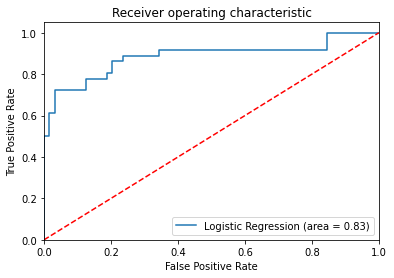

In [56]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## What is the best feature subset? How can we optmize it? 

In [57]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS #SFS 
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import LeaveOneOut

X_train, X_test, y_train, y_test = train_test_split(X_std, train['Survived'], test_size = 0.3, random_state = 42) # faz antes do CV/EFS

col = X_train.columns

X_train = np.array(X_train)
y = np.ravel(np.array(train['Survived']))

logreg.fit(X_train, y_train) ##etro com o treino aqui 

efs = EFS( logreg, min_features=1, max_features=9, scoring='accuracy', print_progress=True, cv=5)

efs = efs.fit(X,y)

print('Best accuracy: %.2f' % efs.best_score_)
print('Best subset (features):', efs.best_feature_names_)
print('Best subset (indices):', efs.best_idx_)

Features: 511/511

Best accuracy: 0.81
Best subset (features): ('Pclass', 'Age', 'Parch', 'Cabin Codified', 'Title Codified', 'Sex Codified')
Best subset (indices): (0, 1, 3, 6, 7, 8)


In [58]:
from sklearn.metrics import confusion_matrix

best_subset = ['Pclass', 'Age', 'Parch', 'Cabin Codified', 'Title Codified', 'Sex Codified']

X_train = pd.DataFrame(X_train, columns= col)
X_test = pd.DataFrame(X_test, columns= col)
X_train = np.array(X_train[best_subset])
X_test = np.array(X_test[best_subset])

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[138  19]
 [ 30  81]]


In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       157
           1       0.81      0.73      0.77       111

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



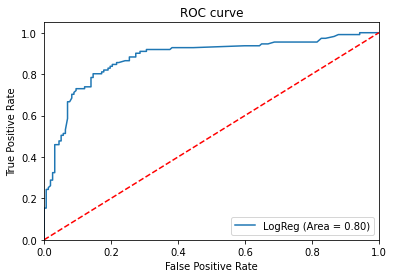

In [60]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LogReg (Area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [61]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('MSE: %0.3f' % mean_squared_error(y_test, y_pred))
print('R-squared: %0.3f' % r2_score(y_test, y_pred))

MSE: 0.183
R-squared: 0.246


## Preprocessing Kaggle 

In [69]:
test = pd.read_csv('test.csv')
Id = test.PassengerId
titles = test['Name'].str.extract(pat = '([,].{1,13}[.])') #select titles 
titles.rename(columns = {0:'Name'},inplace=True) # rename titles df 
titles = titles.Name.str.slice(start=2, stop=-1) # takes only the title 
test['Title']= titles 
test.Title = test.apply(replace_titles, axis=1)

test.loc[~test.Cabin.isnull(),'Cabin'] = 'With'
test.Cabin.fillna('Without', inplace=True)

cols=['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked','Title'] 
X_training= pd.DataFrame(data = test[cols], columns = cols)



X_training[cod] = X_training[cod].astype('category')

X_training['Embarked Codified'] = X_training['Embarked'].cat.codes
X_training['Cabin Codified'] = X_training['Cabin'].cat.codes
X_training['Title Codified'] = X_training['Title'].cat.codes
X_training['Sex Codified'] = X_training['Sex'].cat.codes

cols = cols = ['Pclass','Age','SibSp','Parch','Cabin Codified','Title Codified','Sex Codified']

X_training[['Pclass','Age','SibSp','Parch','Fare','Embarked Codified','Cabin Codified','Title Codified','Sex Codified']] = scaler.fit_transform(X_training[['Pclass','Age','SibSp','Parch','Fare','Embarked Codified','Cabin Codified','Title Codified','Sex Codified']])
X_training.fillna({"Age": 0}, inplace = True)
X_training.drop(columns=['Embarked','Cabin','Title','Sex'], inplace=True)
X_training.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked Codified,Cabin Codified,Title Codified,Sex Codified
0,0.873482,0.298549,-0.499470,-0.400248,-0.497811,-0.470915,0.52753,-0.110487,0.755929
1,0.873482,1.181328,0.616992,-0.400248,-0.512660,0.700767,0.52753,1.209044,-1.322876
2,-0.315819,2.240662,-0.499470,-0.400248,-0.464532,-0.470915,0.52753,-0.110487,0.755929
3,0.873482,-0.231118,-0.499470,-0.400248,-0.482888,0.700767,0.52753,-0.110487,0.755929
4,0.873482,-0.584229,0.616992,0.619896,-0.417971,0.700767,0.52753,1.209044,-1.322876


In [70]:
X_training = np.array(X_training[best_subset])
y_pred = pd.DataFrame( data = logreg.predict(X_training), columns = ['Survived'])
y_pred['PassengerId'] = Id
y_pred.head()

,Survived,PassengerId
0,0,892
1,1,893
2,0,894
3,0,895
4,1,896


In [114]:
y_pred[['PassengerId','Survived']].to_csv(path_or_buf= r'/home/pedro/titanic/titanic_project/result', index=False)

## 0.79 on test at Kaggle! 

Anotar acuracia + submeter a resposta ao kaggle ( ve as diferenças - conversar sobre overfit ) 


compra de bilhete: score de risco de morte
classif - > predict (0,1) : sk predict proba p1=? pra cada 
grupos de p1 e %de morte
segmentação de mortes 


## Random Forrest

In [165]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier( max_depth=2, random_state=5)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=5)

In [166]:
y_pred = clf.predict(X_test)

In [167]:
from sklearn.metrics import confusion_matrix

y_pred = pd.DataFrame(y_pred)
y_test = pd.DataFrame(y_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[135  22]
 [ 32  79]]


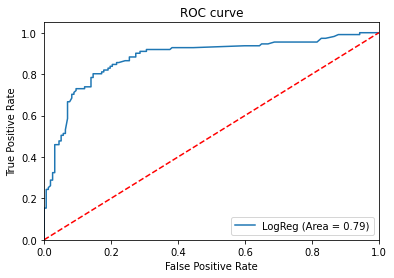

In [168]:
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LogReg (Area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [169]:
clf.score(X_test, y_test)

0.7985074626865671

In [170]:
y_pred = pd.DataFrame( data = clf.predict(X_training), columns = ['Survived'])
y_pred['PassengerId'] = Id
y_pred.head()

,Survived,PassengerId
0,0,892
1,1,893
2,0,894
3,0,895
4,1,896


In [171]:
y_pred[['PassengerId','Survived']].to_csv(path_or_buf= r'/home/pedro/titanic/titanic_project/resultRF', index=False)

## 0.72 on test at Kaggle (worse than before)